In [1]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [2]:
dataname = "m4_monthly_micro"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro.


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


In [4]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [5]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 3396.89,  3257.99,  3158.49,  3176.81,  3157.27,  3108.64,
         3063.8 ,  3098.17,  3106.87,  3096.37,  3193.22,  3230.99,
         3329.66,  3278.32,  3228.59,  3196.76,  3178.63,  3210.04,
         3236.73,  3281.7 ,  3298.  ,  3292.78,  3283.29,  3283.5 ,
         3266.97,  3238.75,  3228.64,  3275.36,  3289.36,  3304.42,
         3386.32,  3449.33,  3480.2 ,  3488.49,  3489.8 ,  3514.08,
         3509.89,  3507.85,  3535.43,  3557.9 ,  3569.59,  3581.05,
         3568.18,  3565.69,  3606.74,  3631.37,  3675.48,  3681.79,
         3677.63,  3697.65,  3706.94,  3697.  ,  3702.05,  3703.11,
         3677.1 ,  3703.61,  3716.26,  3688.9 ,  3665.12,  3615.87,
         3594.32,  3593.57,  3573.24,  3569.07,  3599.18,  3554.01,
         3484.06,  3424.86,  3433.06,  3373.05,  3448.19,  3465.57,
         3465.6 ,  3485.96,  3497.15,  3530.69,  3557.28,  3557.31,
         3504.81,  3521.84,  3527.23,  3572.4 ,  362

## Plot Series

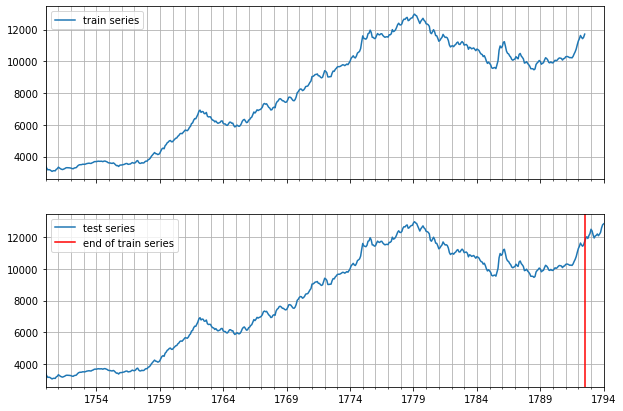

In [6]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [8]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_yearly_micro", seed=i, epochs=10, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.94it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[0] Elapsed time 3.152 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.568095
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.13it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[1] Elapsed time 2.765 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.848611
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.95it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[2] Elapsed time 3.147 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.232252
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.30it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[3] Elapsed time 7.951 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.496647
IN

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.642706  0.12389  57.648696            0.126548            0.090292    42   

   epochs  num_batches  
0      10           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.40it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[0] Elapsed time 9.356 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.569396
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.01it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[1] Elapsed time 6.257 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.887102
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.70it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[2] Elapsed time 4.688 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.171787
INFO:root:Epoch[3] Learning rate is 0.001
  0%|          | 0/50 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame()
df = deepar(data="m4_monthly_industry", seed=44, epochs=314, batches=200)
pprint(df)
results = results.append(df)

results

In [17]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=343, batches=200)
    pprint(df)
    results = results.append(df)

results

In [16]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=172, batches=200)
    pprint(df)
    results = results.append(df)

results

In [15]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=343, batches=100)
    pprint(df)
    results = results.append(df)

results